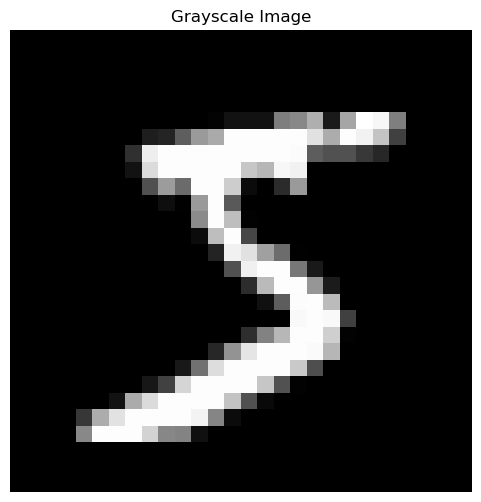

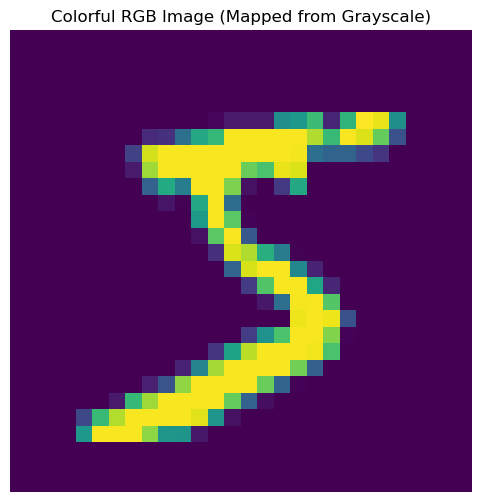

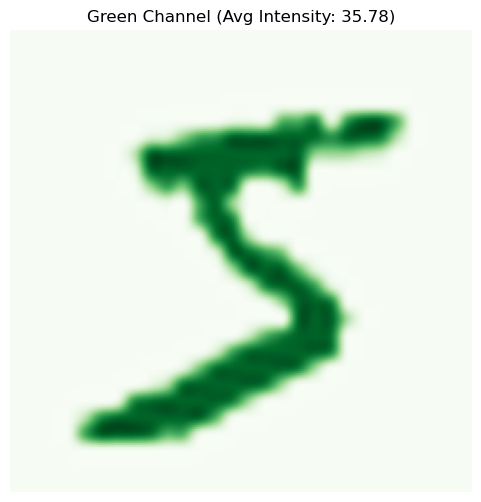

Average Green Intensity: 35.782745361328125


In [1]:
import numpy as np
from PIL import Image
from torchvision import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Load an image from the MNIST dataset
mnist_data = datasets.MNIST(root="./data", train=True, download=True)
image, label = mnist_data[0]  # Select the first image from the dataset

# Step 2: Display the grayscale version
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Step 3: Convert the grayscale image to a more colorful RGB mapping
# Use a colormap (e.g., viridis) to map grayscale to color
image_colored = np.array(image) / 255.0  # Normalize grayscale values to [0, 1]
image_rgb_colormap = cm.viridis(image_colored)  # Apply colormap (RGBA)

# Convert RGBA to RGB by removing the alpha channel
image_rgb = (image_rgb_colormap[:, :, :3] * 255).astype(np.uint8)

# Display the colorful RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Colorful RGB Image (Mapped from Grayscale)")
plt.axis("off")
plt.show()

# Step 4: Resize the RGB image to 256x256
image_resized = Image.fromarray(image_rgb).resize((256, 256))

# Step 5: Convert the resized image to a numpy tensor
rgb_tensor = np.array(image_resized)

# Step 6: Extract the green channel (2nd slice along the 3rd dimension)
green_channel = rgb_tensor[:, :, 1]

# Step 7: Compute the average intensity of the green pixels
avg_green_intensity = np.mean(green_channel)

# Step 8: Display the green channel
plt.figure(figsize=(6, 6))
plt.imshow(green_channel, cmap="Greens")
plt.title(f"Green Channel (Avg Intensity: {avg_green_intensity:.2f})")
plt.axis("off")
plt.show()

# Print the average intensity
print("Average Green Intensity:", avg_green_intensity)

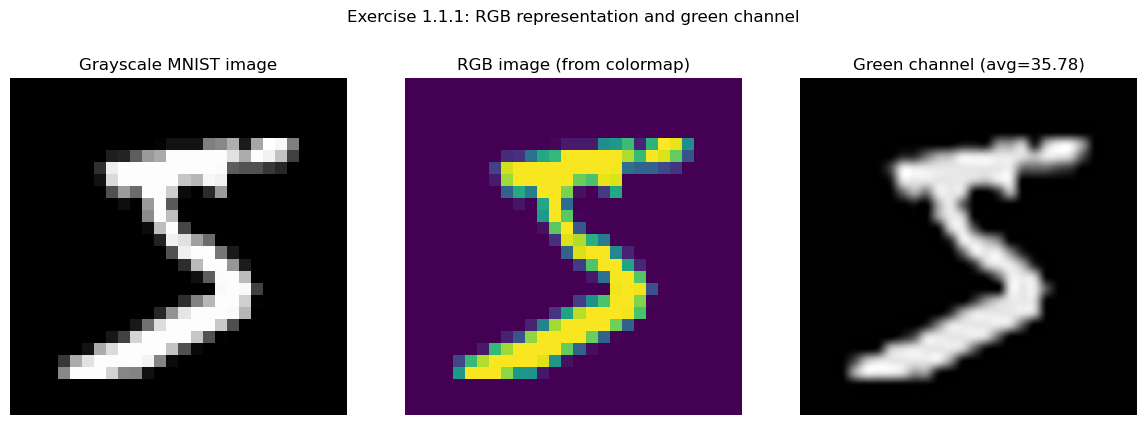

In [2]:
# Three-panel summary figure for Exercise 1.1.1
# Panel 1: original grayscale MNIST image
# Panel 2: RGB image obtained via colormap
# Panel 3: green channel of the resized RGB image

import os
os.makedirs("figs", exist_ok=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Panel 1: grayscale
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Grayscale MNIST image")
axes[0].axis("off")

# Panel 2: RGB mapped image
axes[1].imshow(image_rgb)
axes[1].set_title("RGB image (from colormap)")
axes[1].axis("off")

# Panel 3: green channel of resized RGB image
im = axes[2].imshow(green_channel, cmap="gray")
axes[2].set_title(f"Green channel (avg={avg_green_intensity:.2f})")
axes[2].axis("off")

fig.suptitle("Exercise 1.1.1: RGB representation and green channel", y=1.05)
fig.tight_layout()

# Save figure into the new figs/ directory
fig.savefig("figs/Ex1-1-1image.png", dpi=200, bbox_inches="tight")

plt.show()
